In [1]:
import seaborn as sns  
import matplotlib as plt 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd  
from sklearn.model_selection import train_test_split 
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import numpy as np 
import numpy.random as nr

%matplotlib inline

## Importing the college admissions dataset.

In [2]:
data = pd.read_csv('admissions.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(400, 4)
['admit', 'gre', 'gpa', 'rank']


In [3]:
data.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [4]:
data.describe()   

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


## We get a count of the admited versus not admitted students. 

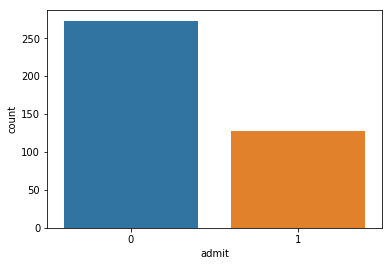

In [5]:
sns.countplot(x = 'admit', data = data)  

## Next we will create a numpy array of the features and label.

In [7]:
Features = np.array(data[['gre', 'gpa', 'rank']])
Labels =  np.array(data[['admit']])   

## Now we will partition the dataset into training and test datasets.

In [8]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Standardize the training dataset using the zscore standardization process.

In [9]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## Next we define and train the KNN model. 
## The KNN model is defined as having K = 3 i.e. three nearest neighbors. The model is trained using the fit method with the feature and label numpy arrays as arguments.

In [12]:
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## The predict method is used to compute KNN predictions from the model using the test features as an argument.

In [13]:
X_test = scale.transform(X_test)
scores = KNN_mod.predict(X_test) 

## Evaluate the performance of the model.

In [14]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                  Score Not Admit   Score Admit    ')
    print('Actual Not Admit     %6d' % conf[0,0] + '            %5d' % conf[0,1]  )            
    print('Actual Admit         %6d' % conf[1,0] + '            %5d' % conf[1,1]  )
        ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Not Admit  Admit  ')
    print('Num case    %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1]         )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1]        )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1]        )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1]        ) 
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                  Score Not Admit   Score Admit    
Actual Not Admit        152               56
Actual Admit             59               33

Accuracy        0.62
 
          Not Admit  Admit  
Num case    208.00     92.00
Precision   0.72      0.37
Recall      0.73      0.36
F1          0.73      0.36


## Another way of getting model accuracy.

In [16]:
num_cols = ['gre', 'gpa', 'rank'] 
data_test = pd.DataFrame(X_test, columns = num_cols) 
data_test['predicted'] = KNN_mod.predict(X_test)
data_test['correct'] = [1 if x == z else 0 for x, z in zip(data_test['predicted'], y_test)] 
accuracy = 100.0*float(sum(data_test['correct']))/float(data_test.shape[0]) 
print(accuracy) 

61.666666666666664


'Done'

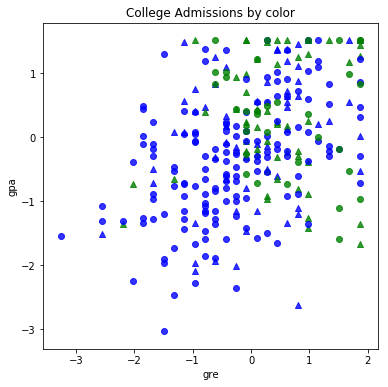

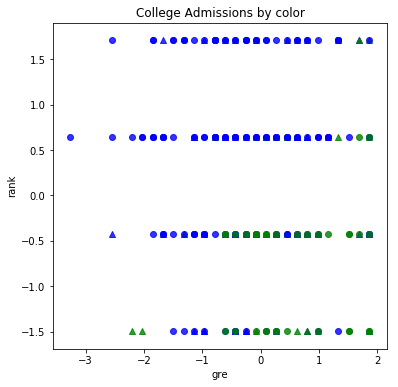

In [20]:
# Examine plots of the classifications of the heart rate categories
levels = {0:'Not Admit', 1:'Admit'}
data_test['admit'] = [levels[x] for x in data_test['predicted']]
markers = {0:'^', 1:'o'}
colors = {'Not Admit':'blue', 'Admit':'green'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['admit'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('College Admissions by color')
    return 'Done'
plot_shapes(data_test, 'gre', 'gpa', markers, colors)
plot_shapes(data_test, 'gre', 'rank', markers, colors) 

## Sensitivity analysis: we will try with k = 5 and k=1 next to see if prediction accuracy improves or not. 

In [23]:
## KNN model with k = 5.

KNN_mod = KNeighborsClassifier(n_neighbors = 5)
KNN_mod.fit(X_train, y_train)
X_test = scale.transform(X_test)
scores = KNN_mod.predict(X_test) 

def print_metrics_5(labels, scores): 
    
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                  Score Not Admit   Score Admit    ')
    print('Actual Not Admit     %6d' % conf[0,0] + '            %5d' % conf[0,1]  )            
    print('Actual Admit         %6d' % conf[1,0] + '            %5d' % conf[1,1]  )
        ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Not Admit  Admit  ')
    print('Num case    %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1]         )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1]        )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1]        )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1]        ) 
    
print_metrics_3(y_test, scores) 

                 Confusion matrix
                  Score Not Admit   Score Admit    
Actual Not Admit        208                0
Actual Admit             92                0

Accuracy        0.69
 
          Not Admit  Admit  
Num case    208.00     92.00
Precision   0.69      0.00
Recall      1.00      0.00
F1          0.82      0.00


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
## KNN model with k = 1.

KNN_mod = KNeighborsClassifier(n_neighbors = 1)
KNN_mod.fit(X_train, y_train)
X_test = scale.transform(X_test)
scores = KNN_mod.predict(X_test)

def print_metrics_1(labels, scores):
    
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                  Score Not Admit   Score Admit    ')
    print('Actual Not Admit     %6d' % conf[0,0] + '            %5d' % conf[0,1]  )            
    print('Actual Admit         %6d' % conf[1,0] + '            %5d' % conf[1,1]  )
        ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Not Admit  Admit  ')
    print('Num case    %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1]         )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1]        )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1]        )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1]        ) 
    
print_metrics_1(y_test, scores) 

                 Confusion matrix
                  Score Not Admit   Score Admit    
Actual Not Admit        208                0
Actual Admit             92                0

Accuracy        0.69
 
          Not Admit  Admit  
Num case    208.00     92.00
Precision   0.69      0.00
Recall      1.00      0.00
F1          0.82      0.00


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## The sensitivity analysis reveals that k = 5 and k = 1 models have greater accuracy. 